In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#functions from task description

def R2(y_data, y_model): #score function
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model): #mean square error
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

#from lecture notes on Ridge/Lasso regression
def create_X(x, y, n): #design matrices for polynomials up to 10th degree
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    print(f'Features/Length beta: {l}') #what amount should we expect?
    X = np.ones((N,l))

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X

In [26]:
# Making meshgrid of datapoints and compute Franke's function
n = 2
N = 100
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))

x_, y_ = np.meshgrid(x,y)

noise = np.random.normal(0, 0.1, len(x_)*len(x_)) #
noise = noise.reshape(len(x_), len(x_)) #why?

z = FrankeFunction(x_, y_) + noise #Franke with noise

<IPython.core.display.Javascript object>


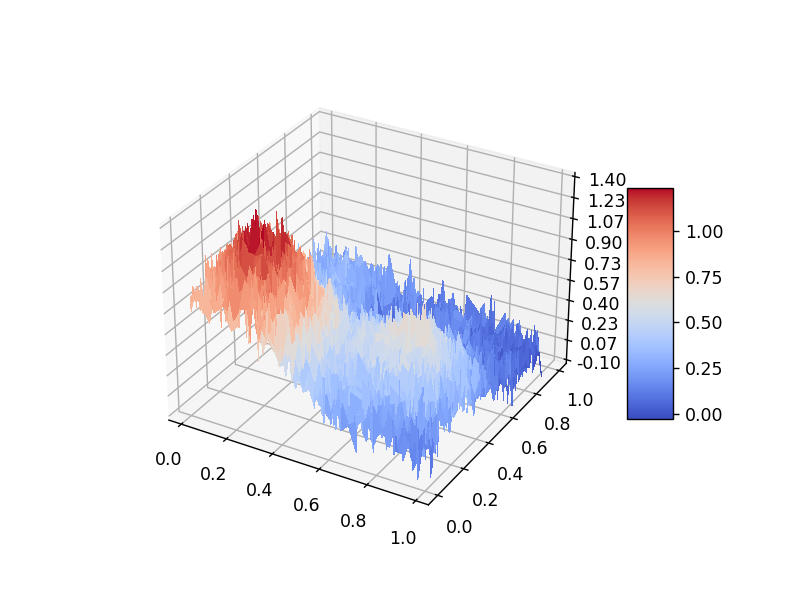

In [13]:
%matplotlib notebook

# Plot the surface.
fig = plt.figure()
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x_, y_, z, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
#linewidth = 0, antialiased = False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [27]:
X = create_X(x_, y_, n)

# We split the data in test and training data, 20%
X_train, X_test, z_train, z_test = train_test_split(X, np.ravel(z), test_size=0.2)

# matrix inversion to find beta
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ z_train
print(beta)

Features/Length beta: 6
[ 1.22243091 -1.20975109 -0.70693516  0.1815436   0.97273606 -0.44812899]


In [28]:
#scikit 
linreg = LinearRegression()
linreg.fit(X, np.ravel(z))

zpredict = linreg.predict(X)
zmatrix = zpredict
#print(np.shape(zpredict))


# and then make the prediction
ztilde = X_train @ beta
print("Training R2")
print(R2(z_train, ztilde))
print("Training MSE")
print(MSE(z_train, ztilde))

zpredict = X_test @ beta
print("Test R2")
print(R2(z_test, zpredict))
print("Test MSE")
print(MSE(z_test, zpredict))

Training R2
0.7219214664041026
Training MSE
0.027217368941351565
Test R2
0.7237151032861787
Test MSE
0.026803188037266022


<IPython.core.display.Javascript object>


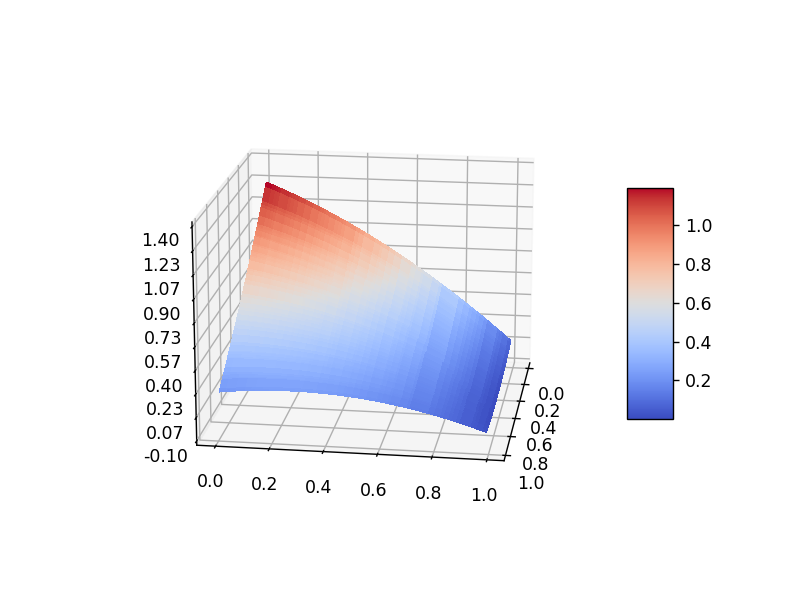

In [29]:
%matplotlib notebook

z_matrix = zmatrix.reshape((N, N))

# Plot the surface.
fig = plt.figure()
ax = fig.add_subplot(projection='3d') #


surf = ax.plot_surface(x_, y_, z_matrix, cmap = cm.coolwarm,
linewidth = 0, antialiased = False)

#predict_surf = ax.plot_trisurf(x, y, zpredict, cmap = cm.coolwarm,
#linewidth = 0, antialiased = False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()